In [3]:
# Install Data and Visualization Tools
!pip install pandas
!pip install yfinance
!pip install matplotlib
!pip install numpy
# Install Machine Learning Libraries
!pip install scikit-learn
!pip install statsmodels

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     -------------------- ----------------- 524.3/949.2 kB 1.6 MB/s eta 0:00:01
     -------------------------------------- 949.2/949.2 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------------------- -------------------- 0.8/1.6 MB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 1.

  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [74]:
# Import Libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from statsmodels.tsa.arima.model import ARIMA

In [39]:
# Get the list of stock tickers
tickers=['WMT', 'TGT', 'COST', 'HD', 'DG']
data=yf.download(tickers, start = '2015-01-01', end = None)
data

C:\Users\leonh\AppData\Local\Temp\ipykernel_10184\4083059370.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(tickers, start = '2015-01-01', end = None)
[*********************100%***********************]  5 of 5 completed


Price            Close                                                 \
Ticker            COST          DG          HD         TGT        WMT   
Date                                                                    
2015-01-02  114.297508   61.930439   80.874939   55.703136  23.320908   
2015-01-05  112.998032   61.527969   79.178154   54.704876  23.253038   
2015-01-06  114.491211   60.749245   78.935738   54.697464  23.432215   
2015-01-07  116.484840   61.484196   81.641220   56.767918  24.053932   
2015-01-08  117.485657   60.819244   83.447479   57.034142  24.561611   
...                ...         ...         ...         ...        ...   
2025-07-30  926.226807  105.540001  372.079987  103.139999  97.589996   
2025-07-31  938.340027  104.900002  367.510010  100.500000  97.980003   
2025-08-01  952.520020  108.529999  373.660004   99.769997  98.489998   
2025-08-04  955.369995  110.940002  380.820007   99.790001  99.589996   
2025-08-05  943.630005  110.860001  385.410004  102.430000  99.309998   

Price             High                                                  ...  \
Ticker            COST          DG          HD         TGT         WMT  ...   
Date                                                                    ...   
2015-01-02  115.540481   62.534171   82.618644   56.671821   23.543530  ...   
2015-01-05  114.741433   62.184198   80.366684   55.836241   23.434936  ...   
2015-01-06  115.370978   62.044205   79.811500   55.229872   23.551671  ...   
2015-01-07  116.573613   61.781689   81.688134   56.901020   24.075651  ...   
2015-01-08  117.921513   61.615465   83.658597   57.492606   24.615908  ...   
...                ...         ...         ...         ...         ...  ...   
2025-07-30  936.452630  107.269997  378.529999  105.000000   98.879997  ...   
2025-07-31  944.641295  106.349998  372.809998  102.629997   98.629997  ...   
2025-08-01  956.719971  109.029999  374.799988  100.309998   98.830002  ...   
2025-08-04  960.179993  111.230003  381.899994  101.059998   99.910004  ...   
2025-08-05  951.500000  111.650002  386.940002  102.959999  100.470001  ...   

Price             Open                                                 \
Ticker            COST          DG          HD         TGT        WMT   
Date                                                                    
2015-01-02  114.507357   61.860440   82.227679   56.279910  23.421358   
2015-01-05  114.362081   61.685464   80.366684   55.584823  23.272044   
2015-01-06  113.490367   61.667967   79.811500   54.941485  23.342623   
2015-01-07  115.096578   61.265453   79.983528   55.370349  23.559822   
2015-01-08  117.485657   61.247978   82.391876   56.797516  24.219535   
...                ...         ...         ...         ...        ...   
2025-07-30  933.706435  106.699997  377.679993  104.709999  98.610001   
2025-07-31  924.079754  105.000000  369.170013  102.349998  97.440002   
2025-08-01  939.500000  105.320000  367.820007   99.519997  98.000000   
2025-08-04  952.599976  108.330002  374.839996  100.010002  98.199997   
2025-08-05  951.330017  109.779999  381.859985  100.059998  99.669998   

Price        Volume                                       
Ticker         COST       DG       HD      TGT       WMT  
Date                                                      
2015-01-02  1471000  2717000  4323700  3710300  13505400  
2015-01-05  1748500  2508500  5878100  3778200  20937000  
2015-01-06  3185200  3640300  4910100  4659300  24615300  
2015-01-07  2171600  4239000  5091000  6946900  25495200  
2015-01-08  2937700  8738500  6464600  6344900  38140800  
...             ...      ...      ...      ...       ...  
2025-07-30  1699600  3020700  3110700  4527100  13864100  
2025-07-31  2564400  3133300  3091600  6442300  15651300  
2025-08-01  2934500  4216800  3008200  5021700  16750400  
2025-08-04  2389900  3329000  2844300  5312700  19050200  
2025-08-05  2460500  2972700  2928100  5091800  17974200  

[2663 rows x 25 colu

In [96]:
weekly_data=data['Close'].asfreq('W', method='pad')
wmt_data=weekly_data['WMT']
tgt_data=weekly_data['TGT']
cost_data=weekly_data['COST']
hd_data=weekly_data['HD']
dg_data=weekly_data['DG']

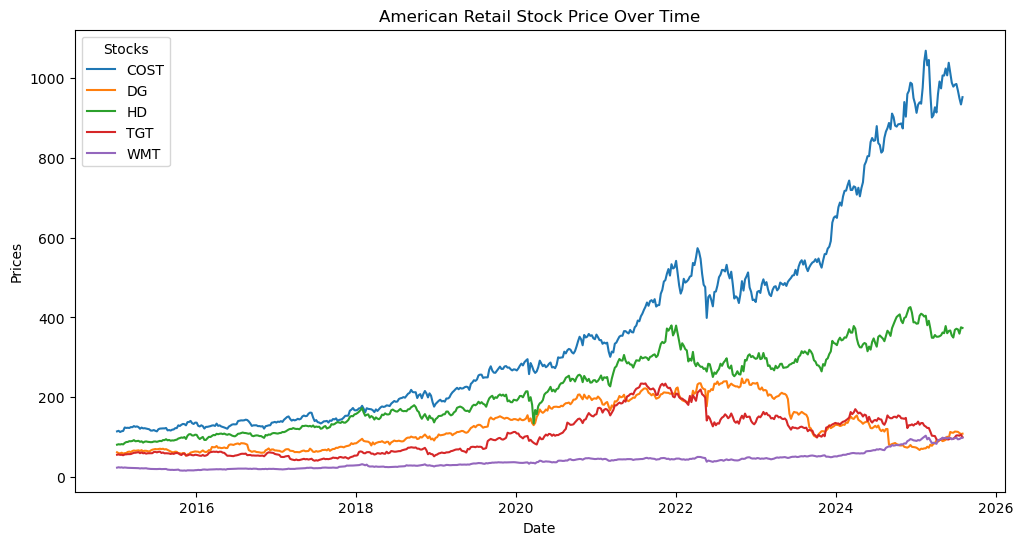

In [73]:
plt.figure(figsize=(12, 6))
for column in weekly_data.columns:
    plt.plot(weekly_data[column], label=column)
plt.title('American Retail Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.grid(False)
plt.legend(title='Stocks')
plt.show()

In [92]:
model = ARIMA(wmt_data, order=(1, 1, 1))
results = model.fit()
forecast = results.forecast(steps=5)
forecast

2025-08-10    98.450120
2025-08-17    98.464559
2025-08-24    98.459331
2025-08-31    98.461224
2025-09-07    98.460539
Freq: W-SUN, Name: predicted_mean, dtype: float64

In [84]:
wmt_data

Date
2015-01-04    23.320908
2015-01-11    24.257555
2015-01-18    23.557108
2015-01-25    24.029493
2015-02-01    23.071140
                ...    
2025-07-06    98.360001
2025-07-13    94.400002
2025-07-20    95.050003
2025-07-27    97.470001
2025-08-03    98.489998
Freq: W-SUN, Name: WMT, Length: 553, dtype: float64